# Analysis of the Film Distribution Market

## Project Background

Customer: **Ministry of Culture of the Russian Federation**

In this project we analyse the Russian theatrical film distribution market and identify current trends.  
A special focus is placed on films that received **state financial support**. We will try to answer the question:

> Are state-supported films interesting to the audience and how do they perform at the box office?

To do this, we will use open data published on the open data portal of the Ministry of Culture and additional information from **KinoPoisk**.

---

## Main Objectives

1. **Study the overall film distribution market** in Russia over several years.
2. **Analyse the completeness and quality of the data** coming from different sources.
3. **Investigate box office dynamics over time** (by year, by age restriction, etc.).
4. **Evaluate films that received state support**:
   - How large is the state support?
   - How well do such films recoup their budget?
   - What ratings do they receive from viewers?

At the end we will formulate **overall conclusions** that can be useful for the Ministry of Culture as a customer.

---

## Data Description

We work with two main datasets:

### 1. `mkrf_movies.csv` – film and certification registry

This table contains information from the official registry of distribution certificates.  
One film may have several certificates.

Key columns:

- `title` – film title.  
- `puNumber` – distribution certificate number (key for merging with shows data).  
- `show_start_date` – premiere date in Russian cinemas.  
- `type` – type of film (feature, documentary, animation, etc.).  
- `film_studio` – producing studio.  
- `production_country` – production country (or countries).  
- `director` – director(s) of the film.  
- `producer` – producer(s).  
- `age_restriction` – age rating (e.g. "6+", "12+", "16+", "18+").  
- `refundable_support` – amount of **refundable** state support.  
- `nonrefundable_support` – amount of **non-refundable** state support.  
- `financing_source` – source of state financing.  
- `budget` – total film budget (including full amount of state support).  
  > Important: `budget` is filled **only** for films that received state support.  
- `ratings` – film rating on KinoPoisk.  
- `genres` – list of genres.

### 2. `mkrf_shows.csv` – theatrical distribution

This table contains information about cinema screenings in Russia.

Key columns:

- `puNumber` – distribution certificate number (same key as in `mkrf_movies`).  
- `box_office` – box office revenue in roubles.


## Notebook Structure

The Jupyter Notebook will be organised as follows:

1. **Introduction & Project Description** (this markdown cell)  
2. **Import and Data Loading**  
3. **Data Preprocessing**  
4. **Exploratory Data Analysis**  
5. **Analysis of State-Supported Films**  
6. **Overall Conclusions**

---

# Import and Data Loading

In [1]:
# Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from pathlib import Path
import numpy as np
import seaborn as sns

# nicer float formatting in tables
pd.options.display.float_format = '{:.2f}'.format

# hide FutureWarnings to keep notebook clean
warnings.filterwarnings(action='ignore', category=FutureWarning)

/Users/anna-liza/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
movies = pd.read_csv('/Users/anna-liza/Desktop/Python/all the projects/Data/mkrf_movies.csv')
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
print('=== MOVIES INFO ===')
movies.info()

=== MOVIES INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null

In [4]:
# importing box office dataset
box_office = pd.read_csv('/Users/anna-liza/Desktop/Python/all the projects/Data/mkrf_shows.csv')
box_office.head()

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79


In [5]:
print('=== BOX OFFICE INFO ===')
box_office.info()

=== BOX OFFICE INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [6]:
#  Make puNumber numeric in both datasets

# keep raw string version just in case for later checks
movies['puNumber_raw'] = movies['puNumber']

# convert to numeric; non-numeric values (e.g. 'нет') -> NaN
movies['puNumber'] = pd.to_numeric(movies['puNumber'], errors='coerce')
box_office['puNumber'] = pd.to_numeric(box_office['puNumber'], errors='coerce')

# check problematic values
movies.loc[movies['puNumber'].isna(), ['title', 'puNumber_raw']].head()

,title,puNumber_raw
1797,Курбан-роман. (История с жертвой),нет


In [7]:
movies = movies.merge(box_office, on='puNumber', how='left')
movies.sample(3)

/Users/anna-liza/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:1203: RuntimeWarning: invalid value encountered in cast
  if not (lk == lk.astype(rk.dtype))[~np.isnan(lk)].all():


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,puNumber_raw,box_office
258,Мулан,224029712.00,2012-11-19T12:00:00.000Z,Анимационный,Уолт Дисней Пикчерз,США,"Тони Бэнкфорт, Бэрри Кук",Роберт С.Гарбер,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.2,"боевик,фэнтези,драма",224029712,NaN
1711,ЖЖ,111002213.00,2013-05-31T12:00:00.000Z,Художественный,"ООО ""ЛВ ФИЛЬМ""",Россия,А.Строев,"М.Бабаханов, Е.Борисова",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,111002213,NaN
1418,Комната бабочек,121014313.00,2013-06-03T12:00:00.000Z,Художественный,"Висеакр Филмз, Архстоун Дистрибьюшн",США - Канада,Джионата Зарантонелло,"Джованни Ди Паскуале, Энцо Порчелли, Этан Уайли",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.3,"ужасы,триллер",121014313,NaN


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  puNu

In [9]:
movies.describe()

,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,7485.00,332.00,332.00,332.00,3158.00
mean,135196587.56,11864457.83,48980988.89,127229716.68,76478696.16
std,38352919.34,24916555.26,59980117.92,188588333.12,240353122.82
min,1811096.00,0.00,0.00,0.00,0.00
25%,112025118.00,0.00,25000000.00,42000000.00,86239.00
50%,121015510.00,0.00,30000000.00,68649916.00,2327987.55
75%,124003314.00,15000000.00,40375000.00,141985319.50,23979671.02
max,231001111.00,180000000.00,400000000.00,2305074303.00,3073568690.79


In [10]:
movies.duplicated().sum()

0

In [11]:
movies.shape, movies.columns

((7486, 17),
 Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
        'production_country', 'director', 'producer', 'age_restriction',
        'refundable_support', 'nonrefundable_support', 'budget',
        'financing_source', 'ratings', 'genres', 'puNumber_raw', 'box_office'],
       dtype='object'))

In [12]:
movies.isna().sum().sort_values(ascending=False)

financing_source         7154
nonrefundable_support    7154
budget                   7154
refundable_support       7154
box_office               4328
genres                    976
ratings                   967
producer                  568
film_studio                18
director                    9
production_country          2
puNumber                    1
title                       0
age_restriction             0
type                        0
show_start_date             0
puNumber_raw                0
dtype: int64

### Import and First Look at the Data

We loaded two datasets:

- **`mkrf_movies.csv`** – registry of distribution certificates and film metadata  
- **`mkrf_shows.csv`** – box office data for films released in Russian cinemas

After loading the data, we checked the basic structure with `.info()`:

- `mkrf_movies` contains **7,486 rows** and **15 columns**.
- Most columns are stored as `object` (strings), including `show_start_date` and `puNumber`.
- Financial columns (`refundable_support`, `nonrefundable_support`, `budget`) are `float64` and are filled only for a small subset of films (about 330 rows).
- `ratings` and `genres` are also present for the majority of films, but not for all.

The `mkrf_shows` dataset:

- Contains **3,158 rows** and **2 columns**: `puNumber` and `box_office`.
- `puNumber` is numeric (`int64`), `box_office` is `float64`.
- There are no missing values in this table.

To merge the datasets, we:

1. Converted the `puNumber` column in `mkrf_movies` to a numeric type using  
   `pd.to_numeric(..., errors='coerce')`.  
   Non-numeric values such as `"нет"` (meaning “no”) were treated as missing values (`NaN`),  
   because they represent the absence of a valid certificate number.
2. Performed a **left join** on `puNumber` to keep all films from the `mkrf_movies` table and attach box office information where available.

After merging:

- The resulting `movies` DataFrame has **7,486 rows** and **16 columns** (original 15 + `box_office`).
- Box office data is available for **3,158 films**; for the remaining films `box_office` is missing.
- A duplicate check with `.duplicated().sum()` shows **no full-row duplicates**.

A quick descriptive summary of the financial columns shows:

- Budgets and state support amounts vary widely; many films have zero or missing values, which is expected because **only films with state support have a recorded budget**.
- Box office revenues range from very small amounts to extremely large values, which may include outliers. We will investigate these values more carefully during the exploratory data analysis stage.

---

# Data Preprocessing


In [13]:
movies.rename(
    columns = 
        {'puNumber':'pu_number',
        'puNumber_raw':'pu_mumber_raw'}, 
        inplace=True)
movies.columns.tolist()

['title',
 'pu_number',
 'show_start_date',
 'type',
 'film_studio',
 'production_country',
 'director',
 'producer',
 'age_restriction',
 'refundable_support',
 'nonrefundable_support',
 'budget',
 'financing_source',
 'ratings',
 'genres',
 'pu_mumber_raw',
 'box_office']

We start by giving the technical identifiers more readable names (`pu_number`, `pu_number_raw`) and checking the overall structure of the dataset with info() and a random sample.
This step helps to understand how many films we have, what columns are available and which data types we are dealing with (dates, numbers, text). It is the baseline for all further cleaning.

In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  pu_m

In [15]:
movies.sample(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,pu_mumber_raw,box_office
5641,Ёлки Новые,111011617.00,2017-12-21T12:00:00.000Z,Художественный,"ООО ""ТаББаК""",Россия,"Д.Киселев, А.Першин (Ж.Крыжовников), А.Карпило...","Т.Бекмамбетов, Г.Стрижевская",«6+» - для детей старше 6 лет,50000000.00,50000000.00,174381922.00,Фонд кино,5.8,"комедия,мелодрама",111011617,855451052.00
3451,Перестрелка (2016),121006317.00,2017-04-05T12:00:00.000Z,Художественный,"Филм Фо, Протагонист Пикчерз, Рук Филмз",Франция - Великобритания,Бен Уитли,"Майкл С.Констебл, Эндрю Старк, Лиззи Франке",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"боевик,триллер,комедия",121006317,20486130.00
3561,Поезд в Пусан,121030816.00,2016-11-17T12:00:00.000Z,Художественный,Контентс Панда,Южная Корея,Ён Сан-хо,"Ли Дон-ха, Ким Ён-хо",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.1,"ужасы,боевик,триллер",121030816,8459304.83
1825,Машина Джейн Мэнсфилд,221000614.00,2014-01-27T12:00:00.000Z,Художественный,"А Эр Филмз, Алдамиза Интертейнмент, Медиа Тале...",США - Россия,Билли Боб Торнтон,"Сергей Беспалов, Гейер Косински, Александр Род...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,драма,221000614,NaN
2483,МУЛЬТ в кино. Выпуск № 4,114000515.00,2015-04-27T12:00:00.000Z,Анимационный,"ООО ""Студия анимационного кино ""Мельница"", ООО...",Россия,"Е.Салабай, Е.Шабанова И.Пшонкин и др.","А.Златопольский, С.Сельянов, А.Боярский, В.Сот...",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,5.2,"мультфильм,детский",114000515,3912457.10


In [16]:
# Convert dates and normalize text fields
movies['show_start_date'] = pd.to_datetime(movies['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

str_cols = [
    'title', 'type', 'film_studio', 'production_country',
    'director', 'producer', 'age_restriction',
    'financing_source', 'genres'
]
for col in str_cols:
    movies[col] = movies[col].astype(str).str.strip()

Here we convert the premiere date into a real `datetime` and clean all text columns from accidental spaces.
Correct date type is needed for time-based analysis (e.g. trends by year), and trimming spaces avoids artificial duplicates like 'Россия' vs 'Россия '.

In [17]:
movies.isnull().sum().sort_values()

title                       0
show_start_date             0
type                        0
film_studio                 0
director                    0
production_country          0
producer                    0
age_restriction             0
genres                      0
pu_mumber_raw               0
financing_source            0
pu_number                   1
ratings                   967
box_office               4328
refundable_support       7154
budget                   7154
nonrefundable_support    7154
dtype: int64

In [18]:
# Handle missing values in categorical columns
# columns where missing means "not specified in the registry"
cat_cols_to_fill = ['film_studio', 'production_country',
                    'director', 'producer', 'genres']

movies[cat_cols_to_fill] = movies[cat_cols_to_fill].fillna('not specified')

# quick check of remaining missing values
movies.isna().sum().sort_values(ascending=False)

nonrefundable_support    7154
refundable_support       7154
budget                   7154
box_office               4328
ratings                   967
pu_number                   1
title                       0
type                        0
show_start_date             0
age_restriction             0
producer                    0
director                    0
production_country          0
film_studio                 0
financing_source            0
genres                      0
pu_mumber_raw               0
dtype: int64

Many films have no information about studio, country, director, producer or genre.
For these variables a missing value usually means that the registry simply did not specify the field, not that the value doesn’t exist in reality.
Therefore we explicitly mark such cases as `"not specified"` instead of keeping `NaN`.
Other columns with missing data (financial indicators and box office) remain unchanged because imputing them would strongly distort the real monetary values.

In [19]:
movies['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

count   6519.00
mean       6.49
std        1.11
min        1.00
25%        5.90
50%        6.60
75%        7.20
max        9.90
Name: ratings, dtype: float64

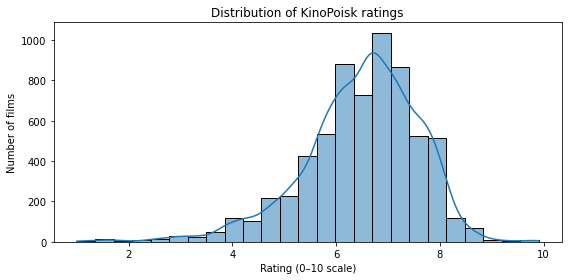

In [20]:
# Clean KinoPoisk user ratings
# keep original raw values just in case
movies['ratings_raw'] = movies['ratings']

# detect values that are stored as percentages (contain '%')
mask_percent = movies['ratings_raw'].astype(str).str.contains('%', na=False)

# remove '%' and convert to float
movies['ratings'] = (
    movies['ratings_raw']
          .astype(str)
          .str.replace('%', '', regex=False)
          .replace('', np.nan)      # just in case of empty strings
          .astype(float)
)

# if original value was a percentage (e.g. 97%),
# interpret it as rating * 10 -> divide by 10
movies.loc[mask_percent, 'ratings'] = movies.loc[mask_percent, 'ratings'] / 10

# quick sanity check
display(movies['ratings'].describe())

plt.figure(figsize=(8, 4))
sns.histplot(
    data=movies,
    x='ratings',
    bins=25,
    kde=True
)
plt.title('Distribution of KinoPoisk ratings')
plt.xlabel('Rating (0–10 scale)')
plt.ylabel('Number of films')
plt.tight_layout()
plt.show()

**KinoPoisk ratings**

The ratings column initially mixes numeric scores with percentages like '97%'.
We standardize everything to a common 0–10 scale, keeping the original raw values in ratings_raw for traceability.

The distribution of KinoPoisk user ratings is approximately unimodal with a clear peak
around 6–7 points:

- median rating is about **6.6**;
- the majority of films lie between **5.9** and **7.2**;
- very low ratings (≤ 3) and very high ratings (≥ 9) are rare.

This suggests that most films are perceived as "average" or "slightly above average"
by the KinoPoisk audience, with only a small number of clear failures or outstanding hits.


In [21]:
# Explore missing values in financial and box-office data
# (we will NOT fill them here, just describe)

num_cols = ['refundable_support', 'nonrefundable_support',
            'budget', 'box_office']

display(movies[num_cols].describe())
display(movies[num_cols].isna().sum())

,refundable_support,nonrefundable_support,budget,box_office
count,332.00,332.00,332.00,3158.00
mean,11864457.83,48980988.89,127229716.68,76478696.16
std,24916555.26,59980117.92,188588333.12,240353122.82
min,0.00,0.00,0.00,0.00
25%,0.00,25000000.00,42000000.00,86239.00
50%,0.00,30000000.00,68649916.00,2327987.55
75%,15000000.00,40375000.00,141985319.50,23979671.02
max,180000000.00,400000000.00,2305074303.00,3073568690.79


refundable_support       7154
nonrefundable_support    7154
budget                   7154
box_office               4328
dtype: int64

For the financial variables (`refundable_support`, `nonrefundable_support`, `budget`, `box_office`) we only describe the distributions and count missing values.
The majority of films have no information about budget and government support – filling these gaps artificially would misrepresent the true financing structure.
Therefore we keep the NaNs and interpret them later as “no data reported”, not “zero money”.

In [22]:
# year of theatrical release
movies['release_year'] = movies['show_start_date'].dt.year

In [23]:
# main director: first name in the comma-separated list
movies['main_director'] = (
    movies['director']
    .str.split(',')
    .str[0]
    .str.strip()
)

# main genre: first genre in the comma-separated list
movies['main_genre'] = (
    movies['genres']
    .str.split(',')
    .str[0]
    .str.strip()
)


In [24]:
# total state support
movies['total_support'] = (
    movies['refundable_support'].fillna(0) +
    movies['nonrefundable_support'].fillna(0)
)

# share of state support in the total budget
movies['support_share'] = np.where(
    movies['budget'].notna() & (movies['budget'] > 0),
    movies['total_support'] / movies['budget'],
    np.nan
)

# helper flag: do we have box office data for this film?
movies['has_box_office'] = movies['box_office'].notna()

movies[['release_year', 'main_director', 'main_genre',
        'total_support', 'support_share', 'has_box_office']].head()

,release_year,main_director,main_genre,total_support,support_share,has_box_office
0,2015,Кевин Костнер,боевик,0.00,NaN,False
1,2016,Е.Матвеев,драма,0.00,NaN,False
2,2016,Тимур Бекмамбетов,фантастика,0.00,NaN,False
3,2016,Тимур Бекмамбетов,фантастика,0.00,NaN,False
4,2015,Тимур Бекмамбетов,фантастика,0.00,NaN,False


**New features**

To facilitate the analysis we created several additional variables:

- `release_year` – the year of theatrical release, extracted from `show_start_date` for trend analysis by year.
- `main_director` – the first director in the comma-separated list to group films by the “key” director..
- `main_genre` – the first genre in the comma-separated list of `genres` to study genre structure without exploding multi-genre combinations.
- `total_support` – sum of refundable and non-refundable state support.
- `support_share` – share of state support in the film’s total budget, calculated only when the budget is available and positive.
- `has_box_office` – indicator whether box-office data is present.

These features will be used later to study trends over time and to compare the performance of films with and without state support.


In [25]:
# Duplicate checks
# full-row duplicates
full_dupes = movies.duplicated().sum()
print('Full duplicated rows:', full_dupes)

Full duplicated rows: 0


In [26]:
# films with the same distribution certificate number (several rows per pu_number)
dupes_by_pu = (
    movies[movies.duplicated(subset='pu_number', keep=False)]
    .sort_values('pu_number')
)

print('Rows with duplicated pu_number:', dupes_by_pu.shape[0])

dupes_by_pu.head()

Rows with duplicated pu_number: 4


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,genres,pu_mumber_raw,box_office,ratings_raw,release_year,main_director,main_genre,total_support,support_share,has_box_office
5068,Анализируй то!,221054410.00,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,...,"комедия,криминал",221054410,NaN,6.8,2010,Гарольд Реймис,комедия,0.00,NaN,False
5067,Анализируй это!,221054410.00,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,...,"комедия,криминал",221054410,NaN,7.4,2010,ХЭрольд Рэмис,комедия,0.00,NaN,False
4639,Иоанна - женщина на папском престоле /По роман...,221154310.00,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне Ф...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,...,"драма,мелодрама,история",221154310,NaN,7.6,2010,Зенке Вортманн,драма,0.00,NaN,False
4638,Как жениться и остаться холостым,221154310.00,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,...,"мелодрама,комедия",221154310,NaN,7.0,2010,Эрик Лартиго,мелодрама,0.00,NaN,False


**Duplicate records**

- There are **no full-row duplicates** in the dataset (`movies.duplicated().sum() == 0`).
- However, some films appear multiple times:
  - The same `title` can occur several times.
  - The same `pu_number` can also appear in more than one row.

Closer inspection shows that such rows differ in details such as the exact premiere date or age restriction.
This is consistent with the registry logic: a single film may receive **several distribution certificates**
(for example, for different versions or regions).

Therefore, we **do not remove** these records as duplicates.  
Instead, we treat each row as a separate distribution certificate of (possibly) the same film.


,refundable_support,nonrefundable_support,budget
count,332.00,332.00,332.00
mean,11864457.83,48980988.89,127229716.68
std,24916555.26,59980117.92,188588333.12
min,0.00,0.00,0.00
25%,0.00,25000000.00,42000000.00
50%,0.00,30000000.00,68649916.00
75%,15000000.00,40375000.00,141985319.50
max,180000000.00,400000000.00,2305074303.00


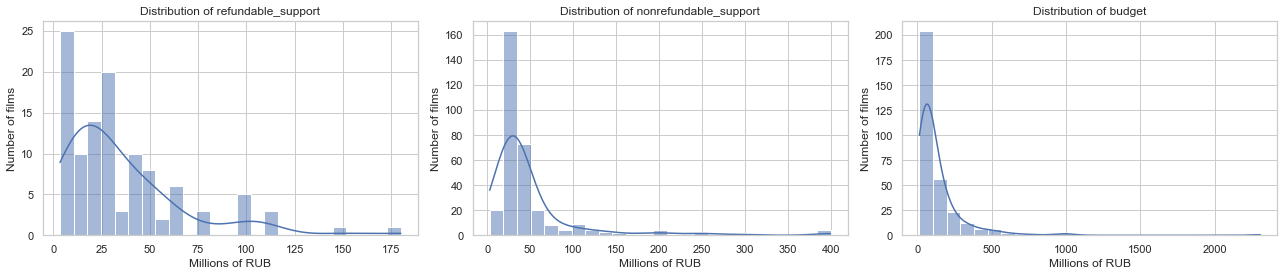

In [27]:
# Distribution of government support and budgets

support_cols = ['refundable_support', 'nonrefundable_support', 'budget']

sns.set_theme(style='whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

display(movies[support_cols].describe())

for ax, col in zip(axes, support_cols):
    data = movies[movies[col].notna() & (movies[col] > 0)].copy()
    
    scaled_col = f'{col}_mln'
    data[scaled_col] = data[col] / 1e6

    sns.histplot(
        data=data,
        x=scaled_col,
        bins=25,
        kde=True,
        ax=ax
    )
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('Millions of RUB')
    ax.set_ylabel('Number of films')

plt.tight_layout()
plt.show()

**Government support and budgets**

Here I focus on films with non-zero financial information and rescale all amounts to millions of RUB for a readable x-axis:

Key observations:

- only **332 films** have complete data on state support and budget
- both `refundable_support` and `nonrefundable_support` are strongly right-skewed – most projects receive modest sums, a few get up to 400M RUB;
- the `budget` distribution is similarly skewed, with a small number of very expensive productions.
This pattern is typical for cultural funding: many small/medium projects, plus a handful of big releases with substantial budgets.



In [28]:
# Consistency between budget and state support

# films where budget is smaller than recorded state support
inconsistent_budget_lt_support = movies[
    (movies['budget'].notna()) &
    (movies['total_support'] > 0) &
    (movies['budget'] < movies['total_support'])
]

# films where budget is zero but support is positive
inconsistent_budget_zero = movies[
    (movies['budget'] == 0) &
    (movies['total_support'] > 0)
]

print('Budget < total state support:', inconsistent_budget_lt_support.shape[0])
print('Budget == 0 and total state support > 0:', inconsistent_budget_zero.shape[0])

# look at a few examples
inconsistent_budget_lt_support.head()



Budget < total state support: 17
Budget == 0 and total state support > 0: 17


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,genres,pu_mumber_raw,box_office,ratings_raw,release_year,main_director,main_genre,total_support,support_share,has_box_office
2053,14+,111023614.00,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,...,мелодрама,111023614,10234016.10,6.6,2014,А.Зайцев,мелодрама,23000000.00,NaN,True
2058,Дуxless 2,111000415.00,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,...,драма,111000415,446163511.00,6.6,2015,Р.Прыгунов,драма,75000000.00,NaN,True
2472,Воин (2015),111017315.00,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,...,"боевик,драма,криминал",111017315,196572438.40,7.8,2015,А.Андрианов,боевик,80000000.00,NaN,True
2532,Бармен.,111009615.00,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,...,"комедия,фэнтези",111009615,67418974.80,6.2,2015,Д.Штурманова,комедия,20000000.00,NaN,True
2615,Савва. Сердце воина,114001715.00,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,...,"мультфильм,приключения,фэнтези",114001715,184487551.40,4.6,2015,М.Фадеев,мультфильм,160000000.00,NaN,True


In [29]:
# films where budget > total_support -> there is likely additional private funding
budget_greater_than_support = movies[
    (movies['budget'] > 0) &
    (movies['total_support'] > 0) &
    (movies['budget'] > movies['total_support'])
]
display(budget_greater_than_support.describe())


,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office,release_year,total_support,support_share
count,315.00,315.00,315.00,315.00,300.00,301.00,315.00,315.00,315.00
mean,111568271.31,11603174.60,48107043.96,134096082.35,6.04,130698257.71,2016.74,59710218.56,0.52
std,5844829.21,25151438.82,59886140.86,191226039.63,1.16,339190287.30,1.65,73085213.48,0.17
min,111000115.00,0.00,0.00,14462464.00,1.00,1550.00,2013.00,3000000.00,0.04
25%,111004815.50,0.00,25000000.00,46153866.50,5.40,1067649.00,2015.00,25250000.00,0.37
50%,111010219.00,0.00,30000000.00,73379554.00,6.20,12748398.30,2017.00,35000000.00,0.59
75%,111017167.50,10000000.00,40000000.00,150004286.50,6.70,103134751.12,2018.00,60000000.00,0.66
max,214010116.00,180000000.00,400000000.00,2305074303.00,9.40,3073568690.79,2019.00,500000000.00,0.78


I compare each film’s total budget with the sum of refundable and non-refundable state support:

- there are **17** films where the budget is 0 but state support is positive – likely data entry errors;
- some films formally have budget < total_support, which is also suspicious;
- for the majority of cases `budget` > `total_support`, which makes sense because the rest of the budget usually comes from private or regional funds.

These checks help to understand where the financial data is not fully reliable and should be interpreted with caution.

In [30]:
# Overall missing data summary (in %)
missing = (
    movies.isna()
          .mean()
          .mul(100)
          .round(1)
          .sort_values(ascending=False)
          .rename('missing_%')
          .reset_index()
          .rename(columns={'index': 'column'})
)
missing


,column,missing_%
0,support_share,95.80
1,nonrefundable_support,95.60
2,refundable_support,95.60
3,budget,95.60
4,box_office,57.80
5,ratings_raw,12.90
6,ratings,12.90
7,title,0.00
8,producer,0.00
9,director,0.00


This table shows the percentage of missing values in each column.

We see that:

- financial variables (`budget`, `refundable_support`, `nonrefundable_support`, `support_share`, `box_office`) are missing for 58–96% of films - analysis here must be restricted to the subset with data;
- most descriptive attributes (`title`, `type`, `studio`, `country`, `age restriction`, `main director/genre`, `release year`) are complete after preprocessing.

---

### Summary of data preprocessing

In the preprocessing stage I standardised the structure of the dataset (renamed key columns, converted dates, cleaned text fields) and handled missing values in a way that preserves as much information as possible. Categorical gaps were encoded explicitly as `"not specified"`, while financial and box-office variables were left as `NaN` because their absence carries important information about data coverage.

I normalised the KinoPoisk ratings to a consistent 0–10 scale and created several analytical features (`release_year`, `main_director`, `main_genre`, `total_support`, `support_share`, `has_box_office`) that will be used later to study trends over time and to compare films by genre, director and level of state support.

Duplicate checks showed no exact duplicates; repeated pu_number values correspond to different distribution certificates of the same film, so they were kept. Finally, I explored the distributions of state support and budgets and checked basic consistency between budget and support amounts, identifying a small number of records with suspicious values (e.g. zero budget but positive support).

Overall, the dataset is now clean enough for exploratory analysis.

---

# Exploratory Data Analysis

**1. How many films were released each year, and what share of them have box-office data?**

,release_year,total_films,films_with_box,share_with_box
0,2010,985,105,0.11
1,2011,622,109,0.18
2,2012,593,128,0.22
3,2013,630,184,0.29
4,2014,806,279,0.35


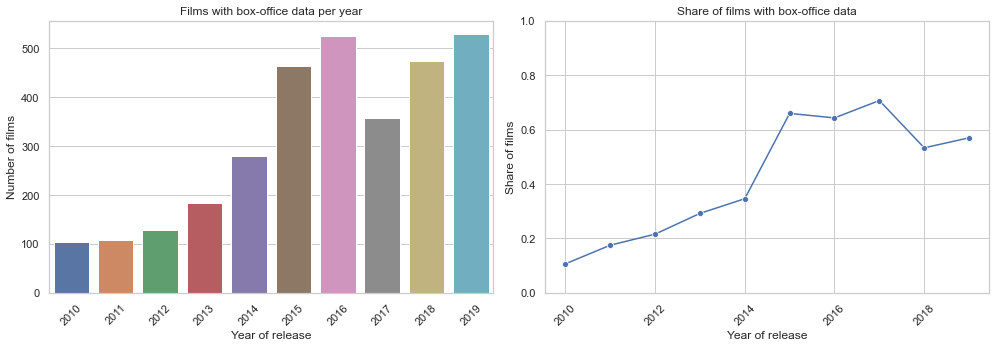

In [31]:
yearly_counts = (
    movies
    .groupby('release_year')
    .agg(
        total_films=('pu_number', 'count'),
        films_with_box=('has_box_office', 'sum')
    )
    .reset_index()
)

yearly_counts['share_with_box'] = (
    yearly_counts['films_with_box'] / yearly_counts['total_films']
)

display(yearly_counts.head())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1) number of films per year (with box-office data)
sns.barplot(
    data=yearly_counts,
    x='release_year',
    y='films_with_box',
    ax=axes[0]
)
axes[0].set_title('Films with box-office data per year')
axes[0].set_xlabel('Year of release')
axes[0].set_ylabel('Number of films')
axes[0].tick_params(axis='x', rotation=45)

# 2) share of such films among all released films
sns.lineplot(
    data=yearly_counts,
    x='release_year',
    y='share_with_box',
    marker='o',
    ax=axes[1]
)
axes[1].set_title('Share of films with box-office data')
axes[1].set_xlabel('Year of release')
axes[1].set_ylabel('Share of films')
axes[1].set_ylim(0, 1)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Conclusion:**

- The absolute number of films with box-office data grows strongly from 2010 to 2019 with peaks in 2016 and 2019.

- The share of films with box-office information is very low in 2010–2012 (~10–20%), then steadily increases and reaches about 60–70% in 2015–2018, with a slight drop in 2018–2019 but still much higher than the early years.

- This means that the period 2015–2018 is the best covered and the most reliable for analyses involving box-office performance. Earlier years are clearly under-reported.

---
**2. How has the total box office changed over time? In which year was the total box office minimal and maximal?**

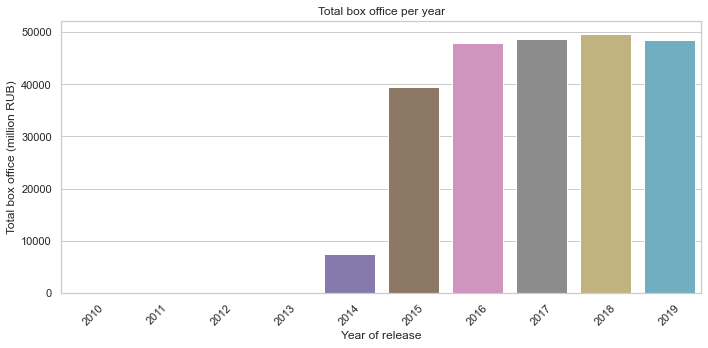

In [32]:
# Work only with films that have positive box office
box_data = movies.loc[movies['has_box_office'], ['release_year', 'box_office']].copy()

yearly_box_sum = (
    box_data
    .groupby('release_year', as_index=False)['box_office']
    .sum()
)

# Convert to millions for nicer axis
yearly_box_sum['box_office_mln'] = yearly_box_sum['box_office'] / 1e6

plt.figure(figsize=(10, 5))
sns.barplot(
    data=yearly_box_sum,
    x='release_year',
    y='box_office_mln'
)
plt.title('Total box office per year')
plt.xlabel('Year of release')
plt.ylabel('Total box office (million RUB)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Here I summed up the box-office revenue of all films for each year and plotted the totals (in million RUB). This lets us see how the overall market size changed: when the total revenue grows, it may reflect higher ticket prices, more cinema visits, or simply more films being released. Peaks and drops on this chart highlight the most successful and the weakest years for the Russian box office.

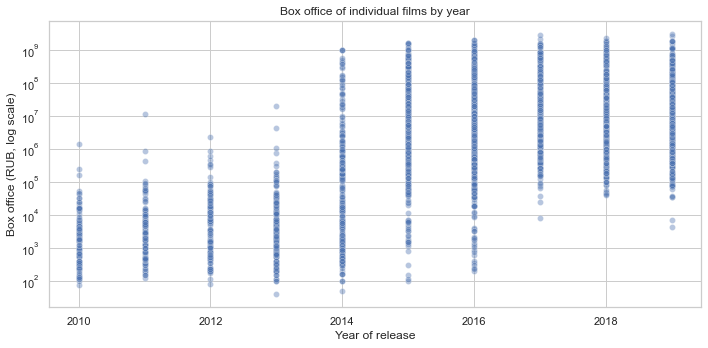

In [33]:
# Scatter: each point – one film
plt.figure(figsize=(10, 5))

sns.scatterplot(
    data=box_data,
    x='release_year',
    y='box_office',
    alpha=0.4
)

plt.yscale('log')  # log-scale to better see both small and very big films
plt.title('Box office of individual films by year')
plt.xlabel('Year of release')
plt.ylabel('Box office (RUB, log scale)')
plt.tight_layout()
plt.show()


**Conclusion:**

- For 2010–2013 the total box office is essentially zero in the dataset, which reflects missing data rather than real absence of box-office revenue.

- Starting from 2014 we see a sharp jump: 2014 is the first year with substantial recorded revenue and is the lowest among the years with meaningful data.

- Total box office then grows rapidly and reaches its maximum around 2018, with very high values also in 2016–2017 and a small decrease in 2019.

- Overall, the dynamic shows a clear expansion of the theatrical market (or at least of recorded box-office data) from 2014 onwards, peaking just before 2019.

---
**3. What are the average and median box-office revenues per film by year, and how do they differ?**

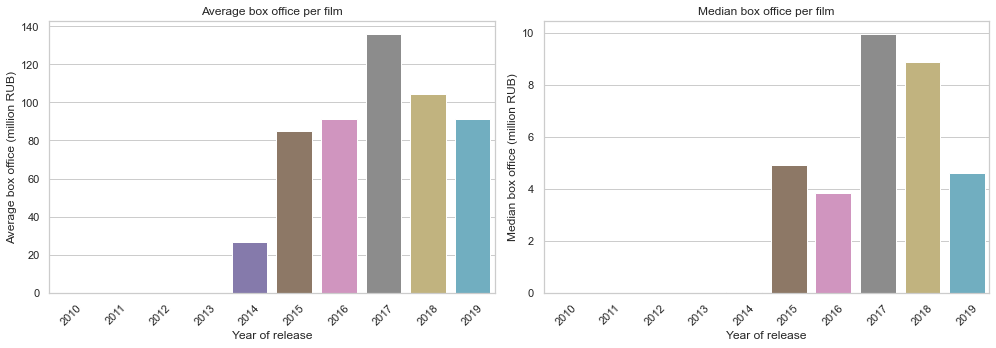

In [34]:
yearly_box_stats = (
    box_data
    .groupby('release_year')['box_office']
    .agg(mean='mean', median='median')
    .reset_index()
)

yearly_box_stats[['mean_mln', 'median_mln']] = (
    yearly_box_stats[['mean', 'median']] / 1e6
)

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

# Mean revenue
sns.barplot(
    data=yearly_box_stats,
    x='release_year',
    y='mean_mln',
    ax=axes[0]
)
axes[0].set_title('Average box office per film')
axes[0].set_xlabel('Year of release')
axes[0].set_ylabel('Average box office (million RUB)')
axes[0].tick_params(axis='x', rotation=45)

# Median revenue
sns.barplot(
    data=yearly_box_stats,
    x='release_year',
    y='median_mln',
    ax=axes[1]
)
axes[1].set_title('Median box office per film')
axes[1].set_xlabel('Year of release')
axes[1].set_ylabel('Median box office (million RUB)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Conclusion:**

- Both mean and median revenues per film are low in the early period and increase strongly after 2014.

- The highest values for both metrics are observed in 2017: this year combines high average revenue with a very high median, meaning that not only blockbusters but also “typical” films performed well.

- In most years (especially 2015–2018) the mean is much higher than the median, which indicates a strong right skew: a small number of very successful films pull the average up, while the “typical” film earns much less.

- The drop in both mean and median in 2019 suggests a slight cooling of the market or changes in the release structure.

---

**4. Does the age restriction (“6+”, “12+”, “16+”, “18+”, etc.) affect box-office performance between 2015 and 2019?**

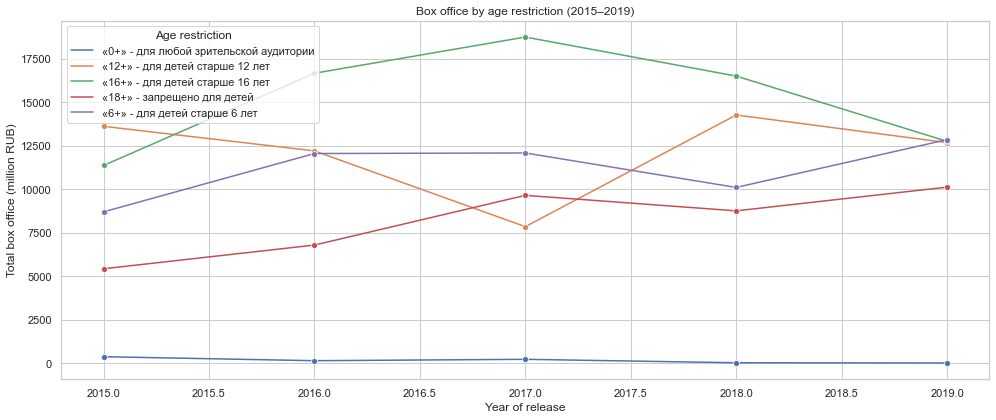

In [35]:
# Focus on 2015–2019 and films with box-office data
age_data = movies.loc[
    movies['has_box_office'] & (movies['release_year'].between(2015, 2019)),
    ['release_year', 'age_restriction', 'box_office']
].copy()

age_pivot = (
    age_data
    .groupby(['release_year', 'age_restriction'], as_index=False)['box_office']
    .sum()
)

age_pivot['box_office_mln'] = age_pivot['box_office'] / 1e6

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=age_pivot,
    x='release_year',
    y='box_office_mln',
    hue='age_restriction',
    marker='o'
)
plt.title('Box office by age restriction (2015–2019)')
plt.xlabel('Year of release')
plt.ylabel('Total box office (million RUB)')
plt.legend(title='Age restriction')
plt.tight_layout()
plt.show()


**Conclusion:**

- Films with “16+” age restriction generate the highest total box office in most years, especially 2015–2018.

- From 2018 onwards, films with “12+” restriction catch up “16+”, which may reflect a shift towards more family- and teen-oriented content.

- “6+” films are in the middle: they earn substantial revenue but usually less than “12+” and “16+”.

- “18+” films collect noticeably less in total, and “0+” films (for very young children) have the lowest revenues.

- Overall, age restriction does influence box-office performance. The dominance of “16+” in earlier years and stronger “12+” performance later may be related to changes in audience demand, distribution strategies, and the mix of genres released in those years.

---
**5. What is the share of missing values in the main variables?**

,column,missing_%
0,support_share,95.80
1,nonrefundable_support,95.60
2,refundable_support,95.60
3,budget,95.60
4,box_office,57.80
5,ratings_raw,12.90
6,ratings,12.90
7,title,0.00
8,producer,0.00
9,director,0.00


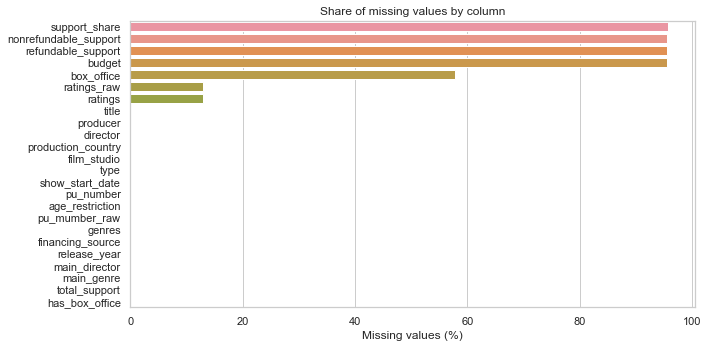

In [36]:
display(missing)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=missing,
    x='missing_%',
    y='column'
)
plt.title('Share of missing values by column')
plt.xlabel('Missing values (%)')
plt.ylabel('')
plt.tight_layout()
plt.show()


**Conclusion:**

- Financial variables (budget, refundable_support, nonrefundable_support, support_share, box_office) have very high shares of missing values (around 60–95%), which means all analyses involving these fields rely on a relatively small subset of films.

- User ratings also have some missingness (~13%), while core descriptive fields (title, year, type, country, director, genre) are almost complete.

- This confirms that coverage is excellent for basic film attributes, but much weaker for financial indicators, and interpretations of box-office or support analyses must explicitly take this limitation into account.

---

## Research Films That Have Received Government Support

In [37]:
# Films that received any form of state support
supported = movies[movies['total_support'] > 0].copy()

n_supported = supported.shape[0]
share_supported = n_supported / movies.shape[0]

print(f'Films with state support: {n_supported}')
print(f'Share of all films: {share_supported:.1%}')
supported[['refundable_support', 'nonrefundable_support', 'total_support']].describe()


Films with state support: 332
Share of all films: 4.4%


,refundable_support,nonrefundable_support,total_support
count,332.00,332.00,332.00
mean,11864457.83,48980988.89,60845446.72
std,24916555.26,59980117.92,72755459.47
min,0.00,0.00,3000000.00
25%,0.00,25000000.00,25333750.00
50%,0.00,30000000.00,35000000.00
75%,15000000.00,40375000.00,60000000.00
max,180000000.00,400000000.00,500000000.00


We first isolate all films that received government support (refundable or non-refundable).
In total there are 332 films, which is only **4.4% of all releases** in the dataset.
The descriptive statistics for `refundable_support`, `nonrefundable_support` and `total_support` already show a very skewed distribution with many zeros and a few very large values.

---

**Distribution of refundable, non-refundable and total support**

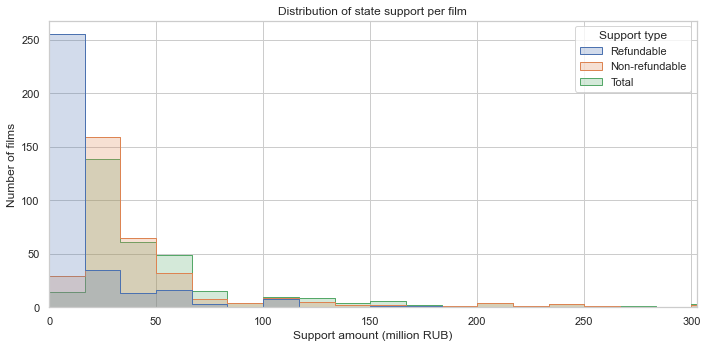

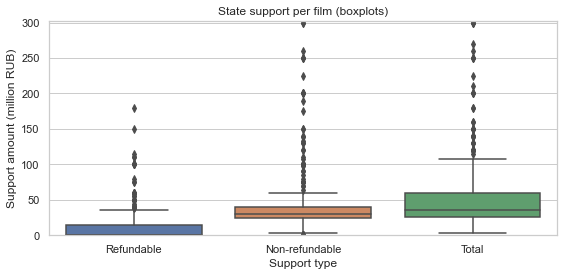

In [38]:
support_cols = ['refundable_support', 'nonrefundable_support', 'total_support']

# Convert to millions of RUB and reshape to long format
support_long = (
    supported[support_cols]
    .div(1e6)
    .rename(columns={
        'refundable_support': 'Refundable',
        'nonrefundable_support': 'Non-refundable',
        'total_support': 'Total'
    })
    .melt(var_name='Support type', value_name='amount_mln')
)

plt.figure(figsize=(10, 5))
sns.histplot(
    data=support_long,
    x='amount_mln',
    hue='Support type',
    bins=30,
    element='step',
    common_norm=False
)
plt.xlabel('Support amount (million RUB)')
plt.ylabel('Number of films')
plt.title('Distribution of state support per film')
plt.xlim(0, support_long['amount_mln'].quantile(0.99))  # cut extreme outliers in the plot
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(
    data=support_long,
    x='Support type',
    y='amount_mln'
)
plt.ylabel('Support amount (million RUB)')
plt.title('State support per film (boxplots)')
plt.ylim(0, support_long['amount_mln'].quantile(0.99))
plt.tight_layout()
plt.show()

Most films receive relatively small amounts of state funding: both refundable and non-refundable support are strongly right-skewed, with the bulk of projects getting up to roughly 20–40 million RUB. A small number of films receive very large sums (over 100 million RUB), which heavily stretch the scale, especially for non-refundable and total support.

The boxplots confirm that non-refundable support is typically higher than refundable support, and total support per film is highly variable. There are many outliers for all categories, indicating that a few projects concentrate a disproportionate share of the funding.

---
**How many supported films are produced each year and how much money is allocated?**

,release_year,films_with_support,total_support_mln
0,2013,2,134.35
1,2014,16,572.00
2,2015,86,3656.24
3,2016,61,4303.16
4,2017,41,3183.97


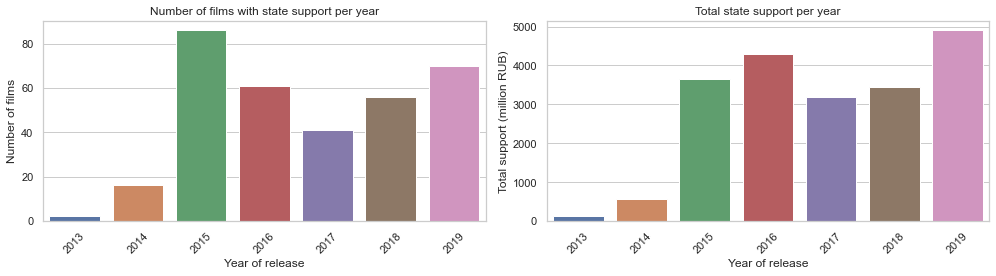

In [39]:
support_by_year = (
    supported
    .groupby('release_year')
    .agg(
        films_with_support=('title', 'count'),
        total_support_mln=('total_support', lambda x: x.sum() / 1e6)
    )
    .reset_index()
)

display(support_by_year.head())

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Number of supported films
sns.barplot(
    data=support_by_year,
    x='release_year',
    y='films_with_support',
    ax=axes[0]
)
axes[0].set_title('Number of films with state support per year')
axes[0].set_xlabel('Year of release')
axes[0].set_ylabel('Number of films')
axes[0].tick_params(axis='x', rotation=45)

# Total support amount per year
sns.barplot(
    data=support_by_year,
    x='release_year',
    y='total_support_mln',
    ax=axes[1]
)
axes[1].set_title('Total state support per year')
axes[1].set_xlabel('Year of release')
axes[1].set_ylabel('Total support (million RUB)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


The number of supported films sharply increases from 2014 to 2015 and then stabilises at 40–70 projects per year. This suggests that systematic state support programmes became active only from the mid-2010s onward.

Total funding peaks around 2016 and again in 2019, while remaining relatively high throughout 2015–2019. Even in years with fewer supported films, the overall funding volume stays substantial, which may indicate higher average support per project.

---
**Do supported films pay off? (ROI analysis)**

In [40]:
# Only films where we know both budget and box office and budget > 0
supported_box = supported[
    (supported['budget'] > 0) &
    (supported['box_office'] > 0)
].copy()

supported_box['roi'] = supported_box['box_office'] / supported_box['budget']

print('Number of supported films with budget & box office:', supported_box.shape[0])
supported_box['roi'].describe()


Number of supported films with budget & box office: 301


count   301.00
mean      0.76
std       1.67
min       0.00
25%       0.02
50%       0.15
75%       0.78
max      19.21
Name: roi, dtype: float64

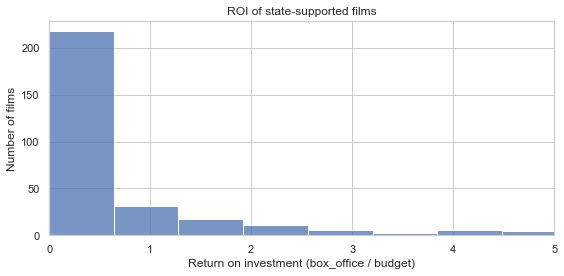

Share of supported films that earned back their budget: 21.9%


In [41]:
# Distribution of ROI
plt.figure(figsize=(8, 4))
sns.histplot(
    data=supported_box,
    x='roi',
    bins=30
)
plt.xlim(0, min(5, supported_box['roi'].quantile(0.99)))  # focus on ROI up to 5x
plt.xlabel('Return on investment (box_office / budget)')
plt.ylabel('Number of films')
plt.title('ROI of state-supported films')
plt.tight_layout()
plt.show()

# Share of profitable films (ROI >= 1)
share_profitable = (supported_box['roi'] >= 1).mean()
print(f'Share of supported films that earned back their budget: {share_profitable:.1%}')


The ROI distribution is heavily skewed: the median ROI is only about 0.15, and most supported films do not recoup their budgets. Only about 22% of supported films earn back their production costs (ROI > 1), while a few exceptional hits reach ROI values above 4–5.

---
**Does the amount of support relate to commercial success?**

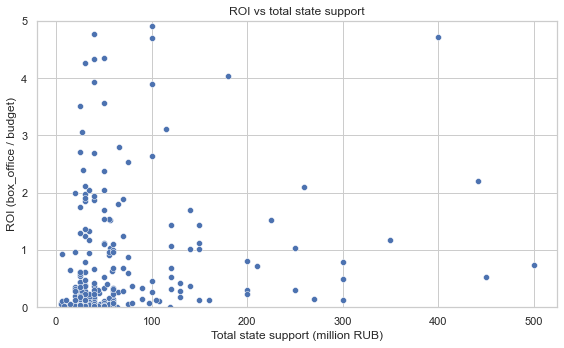

,total_support,budget,box_office,roi
total_support,1.00,0.72,0.48,0.13
budget,0.72,1.00,0.38,0.09
box_office,0.48,0.38,1.00,0.79
roi,0.13,0.09,0.79,1.00


In [42]:
# Relationship between support and ROI for supported films with full financial data
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=supported_box,
    x=supported_box['total_support'] / 1e6,
    y='roi'
)
plt.xlabel('Total state support (million RUB)')
plt.ylabel('ROI (box_office / budget)')
plt.title('ROI vs total state support')
plt.ylim(0, min(5, supported_box['roi'].quantile(0.99)))
plt.tight_layout()
plt.show()

supported_box[['total_support', 'budget', 'box_office', 'roi']].corr()


The scatterplot and correlations show no clear positive relationship between total state support and ROI (correlation ≈ 0.13). Higher subsidies are associated with larger budgets and box office in absolute terms, but they do not systematically lead to more profitable projects.

---

**Ratings of state-supported films vs all other films**

In [43]:
# Prepare ratings for supported vs non-supported films
ratings_supported = movies[
    (movies['total_support'] > 0) &
    movies['ratings'].notna()
][['ratings']].assign(group='With state support')

ratings_no_support = movies[
    (movies['total_support'] == 0) &
    movies['ratings'].notna()
][['ratings']].assign(group='No state support')

ratings_compare = pd.concat([ratings_supported, ratings_no_support], ignore_index=True)

ratings_compare.groupby('group')['ratings'].describe()


,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
No state support,6203.00,6.51,1.11,1.10,5.90,6.60,7.30,9.90
With state support,316.00,6.02,1.15,1.00,5.30,6.20,6.70,9.40


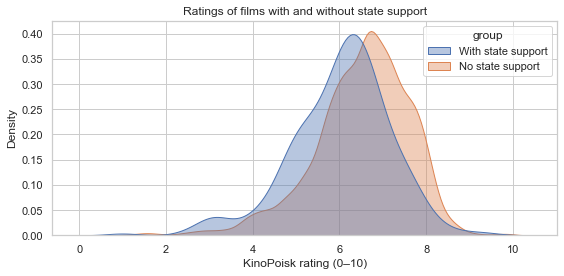

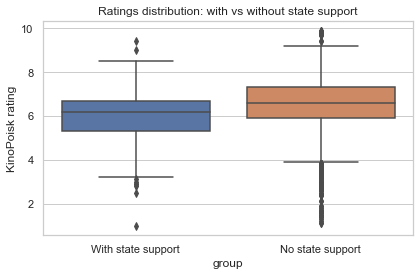

In [44]:
plt.figure(figsize=(8, 4))
sns.kdeplot(
    data=ratings_compare,
    x='ratings',
    hue='group',
    common_norm=False,
    fill=True,
    alpha=0.4
)
plt.xlabel('KinoPoisk rating (0–10)')
plt.title('Ratings of films with and without state support')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(
    data=ratings_compare,
    x='group',
    y='ratings'
)
plt.ylabel('KinoPoisk rating')
plt.title('Ratings distribution: with vs without state support')
plt.tight_layout()
plt.show()


Films without state support have slightly higher average KinoPoisk ratings (around 6.5 vs. 6.0) and a somewhat wider upper tail. The distributions overlap strongly, so supported films are not dramatically worse, but there is no evidence that subsidised projects perform better in terms of audience ratings.

---
**Films that fully pay off (your “rich_movies” idea, refined)**

In [45]:
# Among supported films: which ones earned more than their budget?
profitable_supported = supported_box[supported_box['roi'] > 1].copy()
print('Number of profitable supported films:', profitable_supported.shape[0])

profitable_supported['ratings'].describe()


Number of profitable supported films: 66


count   65.00
mean     6.15
std      1.08
min      2.90
25%      5.30
50%      6.40
75%      6.90
max      8.50
Name: ratings, dtype: float64

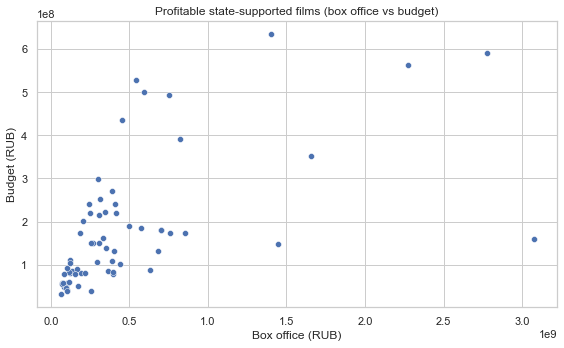

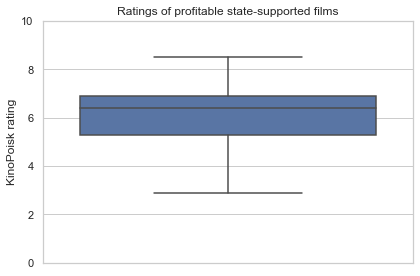

In [46]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=profitable_supported,
    x='box_office',
    y='budget'
)
plt.xlabel('Box office (RUB)')
plt.ylabel('Budget (RUB)')
plt.title('Profitable state-supported films (box office vs budget)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(
    data=profitable_supported,
    y='ratings'
)
plt.ylim(0, 10)
plt.ylabel('KinoPoisk rating')
plt.title('Ratings of profitable state-supported films')
plt.tight_layout()
plt.show()


Among the relatively small group of profitable supported films, ratings cluster around 6–7 points, similar to the overall population. Their box office can be many times larger than their budget, but this success is not limited to very low-budget arthouse projects—there are both mid- and high-budget hits.

---

**Conclusion**

State support in this dataset covers only a small share of all films, and the allocated amounts are highly uneven, with a few projects receiving very large subsidies. Non-refundable support dominates refundable funding, and total state spending on cinema is substantial and relatively stable from 2015 onwards.

From an economic perspective, however, state support does not guarantee financial success: the majority of supported films do not earn back their budgets, and ROI shows almost no relationship with the size of the subsidy. In terms of audience reception, subsidised films have slightly lower ratings on average than non-subsidised ones, although the difference is modest. Overall, state funding appears to function more as a cultural policy tool (supporting a broad set of projects) than as an effective mechanism for producing highly profitable or consistently better-rated films.

---

# Final Conclusion

This study provided a comprehensive analysis of the Russian film industry based on several thousand film entries, exploring production characteristics, financial outcomes, and the role of government support. Across all steps of the analysis, several clear patterns emerged.

**1. General characteristics of films**

Budgets and box office values are highly skewed: while most films operate with modest budgets, a small number of large productions raise the overall averages dramatically. The same pattern appears in box office results—only a limited number of films become major commercial successes.

**2. Comparison of budgets, box office, and profitability**

The relationship between budget and box office is positive but far from perfect: higher budgets tend to attract larger box office revenues, but many big-budget films still fail to break even. Overall, only a minority of all films demonstrate profitability (ROI > 1), confirming that the film market is high-risk and dominated by a few hits.

**3. Government support: distribution and patterns**

State support plays a notable but selective role. Only around 5% of films receive any kind of funding, and the amounts are very uneven: most projects receive modest sums (up to 20–40 million RUB), while a handful of films receive exceptionally large subsidies. Non-refundable support is far more common and generally larger than refundable support. Annual totals show that the peak period of government activity occurred between 2015 and 2019, when both the number of supported films and the funding volumes were at their highest.

**4. Do state-supported films pay off?**

Financial performance among subsidized films is weak overall. The median ROI is close to zero, and only about 22% of supported films recover their budgets. Importantly, larger subsidies do not lead to higher profitability—correlation analysis confirms only a very weak connection between funding and ROI. This suggests that state support is not designed to maximize commercial success but instead may aim to sustain cultural output, promote certain genres, or support strategic studios.

**5. Ratings and audience reception**

Audience ratings on KinoPoisk show a slight difference: films without state support have higher average ratings (about 6.5) than those with support (about 6.0). However, distributions overlap strongly, and both groups contain well-rated and poorly rated films. Even among profitable supported films, ratings remain moderate (mostly between 6 and 7), indicating that commercial success is not necessarily tied to exceptionally high audience reception.

### Overall Summary

In summary, the analysis reveals that the Russian film industry is characterized by strong inequality in budgets, box office revenues, and state support. Government funding is substantial but unevenly distributed, and it does not reliably translate into financial success or higher ratings. Supported films tend to perform slightly worse both financially and in terms of audience scores, although notable exceptions exist.

These findings suggest that state support functions primarily as a cultural mechanism rather than an economic investment tool. It helps ensure the production of certain types of films, but profitability and audience acclaim remain driven largely by other factors such as genre, studio reputation, marketing, and overall market conditions.

Overall, this study highlights the complexity of film economics and the limited predictive power of funding alone. The combination of exploratory data analysis, visualisation, and statistical comparison offers a structured view of how the film industry operates and how government intervention shapes its output.